You are given a dataset Churn_Modelling.csv, which contains data about customer information from a telecom company. The objective is to build a machine learning model to predict whether a customer will churn (i.e., leave the company). This is a binary classification problem.

Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Step 2: Load and Preprocess the Data

1 Load dataset

Steps to Implement: Load the Dataset: Load the dataset from the CSV file into a Pandas DataFrame and store it in data variable. Display the first few rows of the dataset to understand its structure. CSV path : '/srv/shareddata/datasets/nps2/Churn_Modelling/Churn_Modelling.csv'

In [2]:
data = pd.read_csv(r"Downloads\Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


2.Selecting features and target

Selecting Features and Target: Identify the features (independent variables) that will be used to predict customer churn. In this case, select the relevant columns as the feature set X. Identify the target variable (y), which is the column that indicates whether a customer has churned (1) or not (0). In this case, the target variable is Exited.

In [3]:
X = data[['Age', 'IsActiveMember']]
y = data['Exited'] #Exited helps us to identify whether a customer got churned or not

In [4]:
X

,Age,IsActiveMember
0,42,1
1,41,1
2,42,0
3,39,0
4,43,1
...,...,...
9995,39,0
9996,35,1
9997,36,1
9998,42,0


In [5]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

4.Split dataset into training and testing sets

You are working with a customer churn dataset, Churn_Modelling.csv, and your goal is to prepare the data for training a machine learning model. To do this, you need to split the dataset into training and testing sets, which will allow you to train your model on a subset of the data and evaluate its performance on an unseen subset. Steps to implement Split the data into training and testing sets, where: The training set will be used to train the model. The testing set will be used to evaluate the model's performance. Use an 80-20 split, where 80% of the data is used for training and 20% for testing. Set the random_state to a fixed value (e.g., 42) for reproducibility.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Here i am doing test_size = 0.2 because 20% is 20/100

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

Test Case 1 Validate Shapes of Training and Testing Sets

Step 3: Model Building

1: Initialize the Decision Tree Classifier

Your goal is to initialize a model that can later be trained on the dataset to predict whether a customer will churn. Initialize a Decision Tree Classifier using the DecisionTreeClassifier() class and store it in rf_model. Set the random_state parameter to a fixed value (e.g., 42) to ensure reproducibility.

In [8]:
rf_model = DecisionTreeClassifier(random_state=42, max_depth=5)
#here max depth means complexity of the model

Step 4: Train the Model

After the model is initialized(rf_model), you will train the model on the training data (X_train, y_train) using .fit().

In [9]:
rf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Test Case 2 Validate DecisionTreeClassifier initialization

Step 5: Making Predictions

You have already initialized a Decision Tree Classifier and split the dataset into training and testing sets. Now, your task is to predict whether a customer will churn based on the test data. The model should use the features from the test set to make predictions. Predict on Test Data: Use the trained model to predict the target variable on the test set (X_test). The predictions will be stored in the variable y_pred.

In [10]:
y_pred = rf_model.predict(X_test)

Step 6: Evaluate the Model

Steps to Implement:

Use the Predictions: You have already made predictions on the test data using the trained model. The predicted values are stored in the variable y_pred. Evaluate the Model's Accuracy: Compare the predicted values (y_pred) with the actual target values (y_test) to evaluate the model's accuracy. Use the accuracy_score() function from sklearn.metrics to calculate the accuracy, which is the proportion of correct predictions. Print the Accuracy: Print the calculated accuracy score on the test data to evaluate how well the model performs.

In [11]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.834


Step 7: Visualize the confusion matrix

You have made predictions using the Decision Tree Classifier and evaluated the model's accuracy. Now, your task is to visualize the model's performance using a confusion matrix. The confusion matrix will help you understand how well the model is classifying the customers (i.e., how many churned and non-churned customers were correctly or incorrectly predicted)

Steps to Implement: Import Required Libraries: You need to import the necessary libraries, such as confusion_matrix from sklearn.metrics and seaborn for visualization. Compute the Confusion Matrix: Use the confusion_matrix() function to compute the confusion matrix by comparing the actual labels (y_test) with the predicted labels (y_pred). Print the Confusion Matrix: Print the confusion matrix to check the true positives, true negatives, false positives, and false negatives. Visualize the Confusion Matrix: Use seaborn.heatmap() to create a heatmap of the confusion matrix. This visualization will provide an intuitive understanding of how well the model is performing. Add labels, title, and axis ticks to make the plot more informative.

Confusion Matrix:  [[1555   52]
 [ 280  113]]


Text(50.722222222222214, 0.5, 'Predictions')

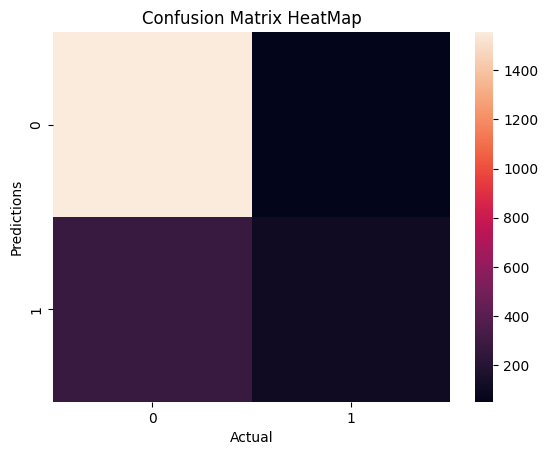

In [12]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ", cm)
plt.title("Confusion Matrix HeatMap")
sns.heatmap(cm)
plt.xlabel('Actual')
plt.ylabel('Predictions')